In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import mode


In [2]:
path = "C:/Users/Nabiya/OneDrive - Duke University/Duke/Academic/Everything Data/Project/feelingeeegmotins/emotions.csv"
data = pd.read_csv(path)
data.head(20)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.00,15.60,26.3,1.0700,0.411,-15.700,2.060,3.150,...,23.50,20.30,20.30,23.50,-215.00,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.00,25.80,22.8,6.5500,1.680,2.880,3.830,-4.820,...,-23.30,-21.80,-21.80,-23.30,182.00,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.00,16.70,23.7,79.9000,3.360,90.200,89.900,2.030,...,462.00,-233.00,-233.00,462.00,-267.00,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.00,19.80,24.3,-0.5840,-0.284,8.820,2.300,-1.970,...,299.00,-243.00,-243.00,299.00,132.00,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.20,27.30,24.5,34.8000,-5.790,3.060,41.400,5.520,...,12.00,38.10,38.10,12.00,119.00,-17.60,23.90,23.90,-17.60,NEUTRAL
5,31.000,30.9,29.60,28.50,24.0,1.6500,1.540,3.830,1.870,-1.210,...,-1.48,30.20,30.20,-1.48,134.00,3.59,-12.70,-12.70,3.59,NEUTRAL
6,10.800,21.0,44.70,4.87,28.1,2.1400,1.020,13.200,1.160,-4.390,...,-15.60,-41.00,-41.00,-15.60,89.50,40.60,-55.20,-55.20,40.60,POSITIVE
7,17.800,27.8,-102.00,16.90,26.9,-3.2100,-1.950,9.800,-3.240,-0.955,...,-177.00,32.80,32.80,-177.00,-417.00,384.00,-186.00,-186.00,384.00,NEGATIVE
8,11.500,29.7,34.90,10.20,26.9,-38.0000,-1.650,3.890,-33.500,-3.300,...,-8.38,38.70,38.70,-8.38,115.00,-7.00,3.20,3.20,-7.00,NEUTRAL
9,8.910,29.2,-314.00,6.51,30.9,-1.8800,1.900,11.900,-3.600,5.700,...,226.00,-81.80,-81.80,226.00,1.84,99.40,-40.30,-40.30,99.40,NEGATIVE


#### I have decided to train my model based on the FFT data only (Fast Fourier Transform). This is because I could not make sense out of the other values. 

#### Here we observe EEG data from one trial per each condition


<Axes: xlabel='label'>

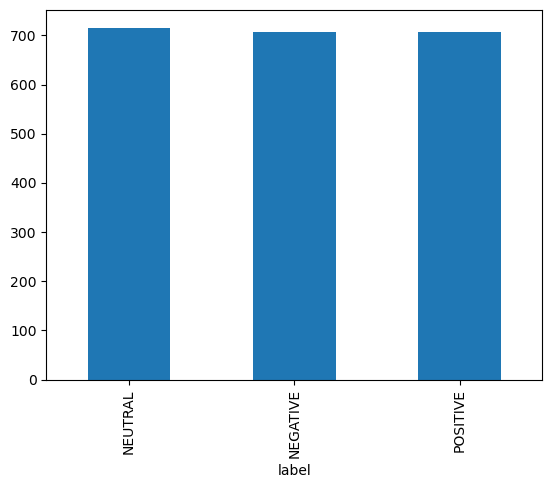

In [3]:
data['label'].value_counts().plot(kind='bar')

In [4]:
positive = data.loc[data["label"]=="POSITIVE"].reset_index(drop=True)
sample_positive = positive.loc[100, 'fft_0_b':'fft_749_b']
negative = data.loc[data["label"]=="NEGATIVE"].reset_index(drop=True)
sample_negative = negative.loc[np.random.randint(50), 'fft_0_b':'fft_749_b']
neutral = data.loc[data["label"]=="NEUTRAL"].reset_index(drop=True)
sample_neutral = neutral.loc[np.random.randint(10, neutral.shape[0]), 'fft_0_b':'fft_749_b']

In [5]:
useless_df = pd.concat([sample_positive, sample_negative, sample_neutral], axis=1)
useless_df.columns = ['positive', 'negative', 'neutral']
# facetgrid the data

useless_df = useless_df.T
useless_df.reset_index(inplace=True)
useless_df = pd.melt(useless_df, id_vars=['index'], var_name='fft', value_name='amplitude')

useless_df.head()


,index,fft,amplitude
0,positive,fft_0_b,86.1
1,negative,fft_0_b,-470.0
2,neutral,fft_0_b,137.0
3,positive,fft_1_b,5.19
4,negative,fft_1_b,406.0


<Figure size 10000x1000 with 0 Axes>

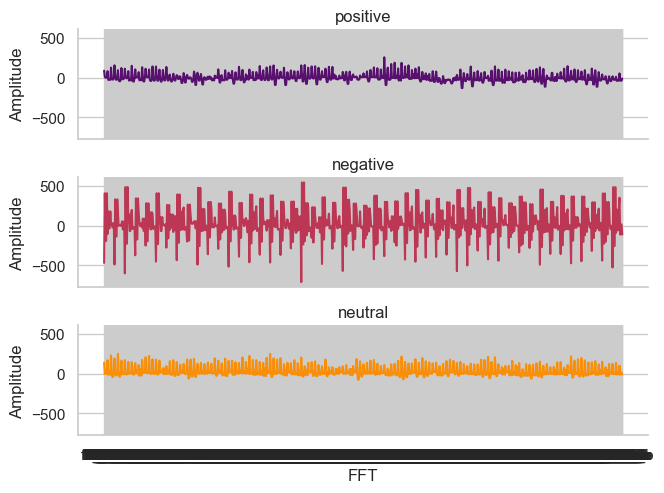

In [6]:
plt.figure(figsize=(100, 10))
sns.set(style='whitegrid')
g = sns.FacetGrid(useless_df, row='index', height=1.7, aspect=4, hue='index', palette='inferno')    
g.map(sns.lineplot, 'fft', 'amplitude')
g.set_axis_labels('FFT', 'Amplitude')
g.set_titles('{row_name}')
g.fig.tight_layout()
plt.show()

#### Just to show the data for 3 random trials for each of the conditions. 

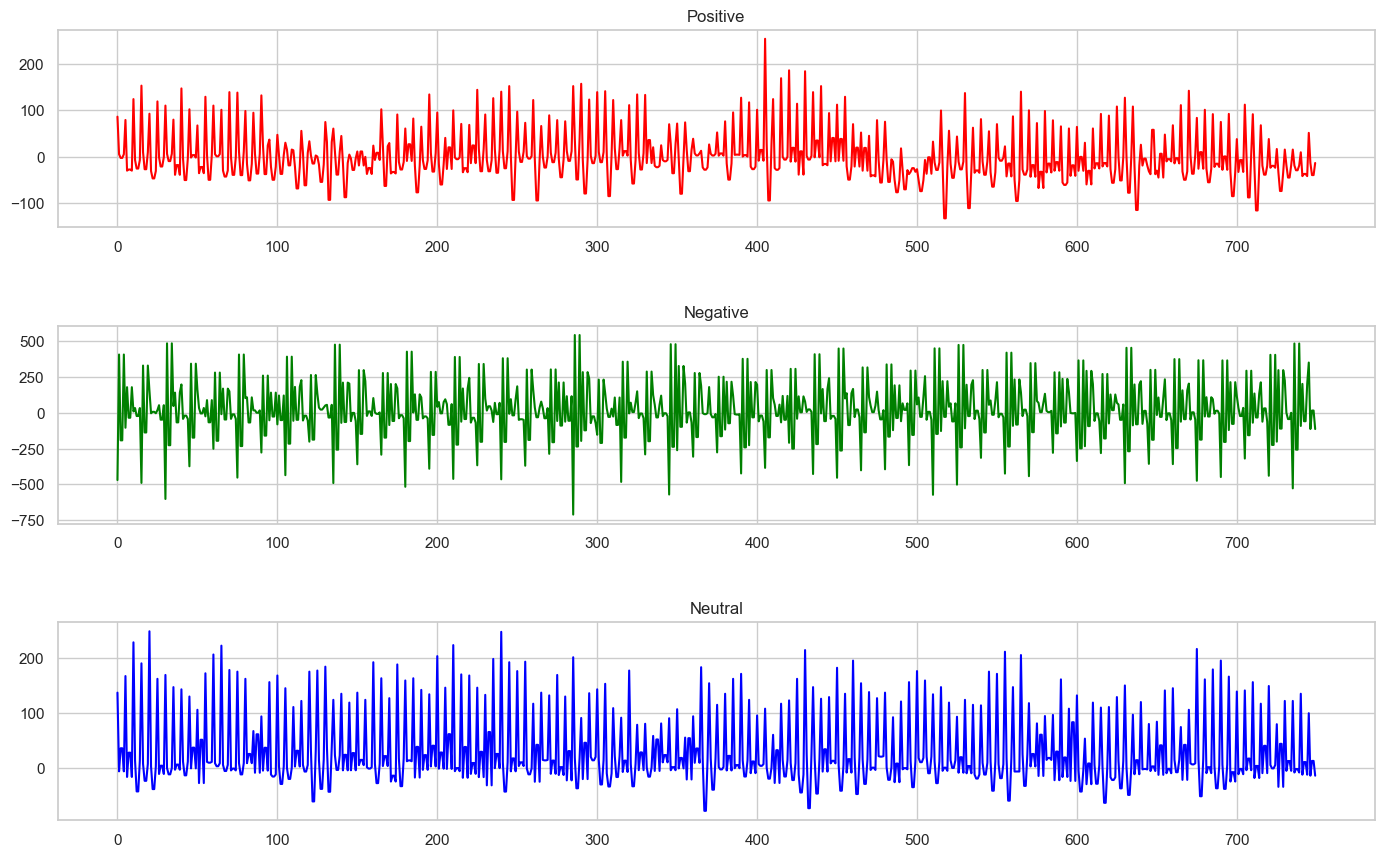

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5)
ax[0].plot(range(len(sample_positive)), sample_positive, color='red')
ax[0].set_title('Positive')
ax[1].plot(range(len(sample_negative)), sample_negative, color='green')
ax[1].set_title('Negative')
ax[2].plot(range(len(sample_neutral)), sample_neutral, color='blue')
ax[2].set_title('Neutral')
plt.show()

#### We are going to be using a more complex model for this project given the complicity of brain activity. 


Accuracy: 0.8220140515222483
              precision    recall  f1-score   support

    NEGATIVE       0.75      0.77      0.76       143
     NEUTRAL       0.97      0.97      0.97       148
    POSITIVE       0.74      0.72      0.73       136

    accuracy                           0.82       427
   macro avg       0.82      0.82      0.82       427
weighted avg       0.82      0.82      0.82       427

Baseline Accuracy: 0.3185011709601874


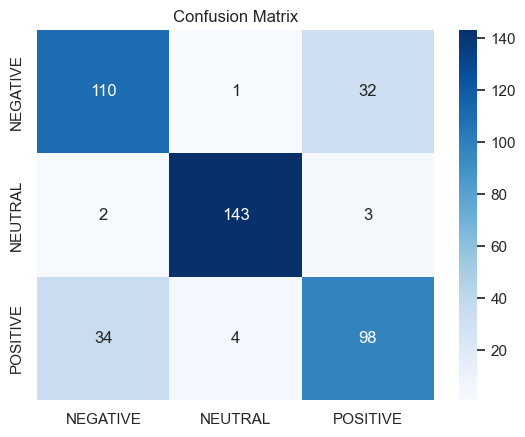

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['label'])

X = data.drop('label', axis=1)
# assuming that the features in the FFT of the signal are the only features we care about
X = X[[col for col in X.columns if 'fft' in col]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#### Let's save some portion of the rows we have for future testing of the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear') 
svm_clf.fit(X_train, y_train)
# les test
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# get most frequent item in y_train 
baseline_y = mode(y_train)[0]
baseline_y = np.full(y_test.shape, baseline_y)
baseline_accuracy = accuracy_score(y_test, baseline_y)
print(f'Baseline Accuracy: {baseline_accuracy}')


sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.show()

### For fun, let's do something less auspicious... let's train our model on the data from participant a and attempt predicting participant b. 

Baseline Accuracy: 0.33583489681050654
SVC Model Accuracy: 0.9695121951219512
              precision    recall  f1-score   support

    NEGATIVE       0.97      1.00      0.98       708
     NEUTRAL       0.98      0.97      0.97       716
    POSITIVE       0.96      0.94      0.95       708

    accuracy                           0.97      2132
   macro avg       0.97      0.97      0.97      2132
weighted avg       0.97      0.97      0.97      2132



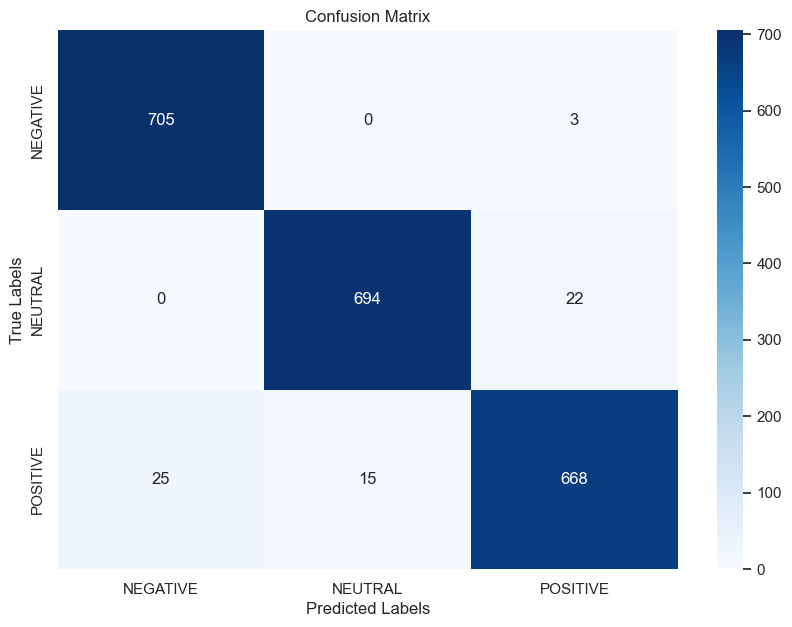

In [9]:
X_train_b = data[[col for col in data.columns if 'fft' in col and col.endswith('_b')]]
y_train_b = data['label']

X_test_a = data[[col for col in data.columns if 'fft' in col and col.endswith('_a')]]
y_test_a = data['label']

label_encoder = LabelEncoder()
y_train_b_encoded = label_encoder.fit_transform(y_train_b)
y_test_a_encoded = label_encoder.transform(y_test_a)

scaler_b = StandardScaler()
X_train_b_scaled = scaler_b.fit_transform(X_train_b)

clf = SVC()
clf.fit(X_train_b_scaled, y_train_b_encoded)


scaler_a = StandardScaler()
X_test_a_scaled = scaler_a.fit_transform(X_test_a)


y_pred_a = clf.predict(X_test_a_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test_a_encoded, y_pred_a)

# let's see how basline accuracy would be
baseline_y = mode(y_train_b_encoded)[0]
baseline_y = np.full(y_test_a_encoded.shape, baseline_y)
baseline_accuracy = accuracy_score(y_test_a_encoded, baseline_y)
print(f'Baseline Accuracy: {baseline_accuracy}')
print(f'SVC Model Accuracy: {accuracy}')
print(classification_report(y_test_a_encoded, y_pred_a, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test_a_encoded, y_pred_a)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### I was not expecting such an accuracy score. This generalizability is great. I wonder of such accuracy would be present if the tasks participants do are much more refined than merely emotions. For example, could we train a classifier on speech, fear, or thoughts(this one is too far)? I guess not, but probably with powerful CNN it might be feasible in the near future or nearer